In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('breast-cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data['target'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
data = data.drop(columns = 'diagnosis')

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
data.shape

(569, 32)

In [7]:
data.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

In [8]:
data['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [9]:
data.groupby('target').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [10]:
X = data.drop(columns = 'target')
Y = data['target']

In [11]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2, random_state=420)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.2, random_state=420)

print("Train Shape:", X_train.shape, "Validation Shape:", X_val.shape, "Test Shape:", X_test.shape)


Train Shape: (364, 31) Validation Shape: (91, 31) Test Shape: (114, 31)


In [12]:
scalar = StandardScaler()

scaled_X_train = scalar.fit_transform(X_train)
scaled_X_val = scalar.transform(X_val)
scaled_X_test = scalar.transform(X_test)

In [13]:
X_train_tensor = torch.tensor(scaled_X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(scaled_X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(scaled_X_test, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32).unsqueeze(1)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).unsqueeze(1)


In [14]:
train_data = TensorDataset(X_train_tensor, Y_train_tensor)
val_data = TensorDataset(X_val_tensor, Y_val_tensor)
test_data = TensorDataset(X_test_tensor, Y_test_tensor)

In [15]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [16]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, 16)
        self.hidden2 = nn.Linear(16, 8)
        self.output = nn. Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.sigmoid(self.output(x))

        return x

In [17]:
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size = input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [18]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
epochs = 25


for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for X_batch, Y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)
        predicted = (outputs >= 0.5).float()
        correct += (predicted == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss /= total
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * X_batch.size(0)
            predicted = (outputs >= 0.5).float()
            correct += (predicted == Y_batch).sum().item()
            total += Y_batch.size(0)

        val_loss /= total
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    # Print epoch metrics
    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


Epoch 1/25, Train Loss: 0.7029, Train Accuracy: 0.4011, Val Loss: 0.6850, Val Accuracy: 0.6264
Epoch 2/25, Train Loss: 0.6739, Train Accuracy: 0.7418, Val Loss: 0.6609, Val Accuracy: 0.7912
Epoch 3/25, Train Loss: 0.6465, Train Accuracy: 0.8571, Val Loss: 0.6370, Val Accuracy: 0.8571
Epoch 4/25, Train Loss: 0.6199, Train Accuracy: 0.8929, Val Loss: 0.6129, Val Accuracy: 0.9121
Epoch 5/25, Train Loss: 0.5915, Train Accuracy: 0.9203, Val Loss: 0.5876, Val Accuracy: 0.9011
Epoch 6/25, Train Loss: 0.5605, Train Accuracy: 0.9231, Val Loss: 0.5601, Val Accuracy: 0.9011
Epoch 7/25, Train Loss: 0.5272, Train Accuracy: 0.9313, Val Loss: 0.5301, Val Accuracy: 0.9121
Epoch 8/25, Train Loss: 0.4915, Train Accuracy: 0.9313, Val Loss: 0.4980, Val Accuracy: 0.9121
Epoch 9/25, Train Loss: 0.4533, Train Accuracy: 0.9368, Val Loss: 0.4648, Val Accuracy: 0.9121
Epoch 10/25, Train Loss: 0.4159, Train Accuracy: 0.9451, Val Loss: 0.4321, Val Accuracy: 0.9121
Epoch 11/25, Train Loss: 0.3799, Train Accuracy: 

In [19]:
test_accuracies = []

model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, Y_batch in test_loader:
        output = model(X_batch)
        prediction = (output>= 0.5).float()
        correct += (prediction == Y_batch).sum().item()
        total += Y_batch.size(0)

    test_accuracy = correct/total *100
    test_accuracies.append(test_accuracy)

print(f"Test Accuracy: {test_accuracy:.4f} %")


Test Accuracy: 96.4912 %


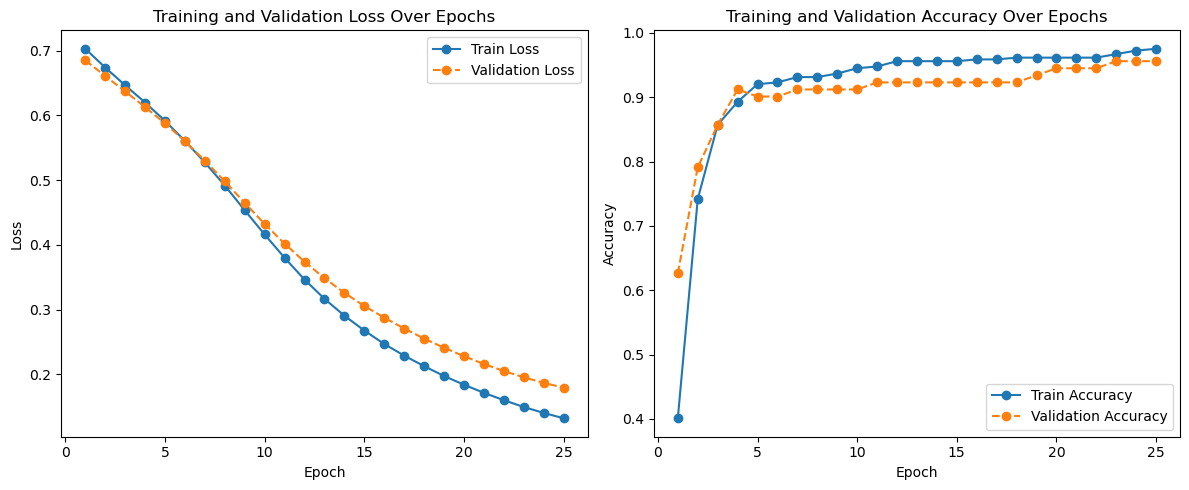

In [20]:
# Plotting the metrics
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy', marker='o', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
